# Quarks & Gluons
Pythia is a program which specializes in generation of high energy collision effects that happen in Physics. In the current model we are going to focus on one of the type of collisions in which quarks and gluons are produced. The model aims to identify the type of particles based on 4 different features which are namely-
1. Transverse Momentum of particle
2. Rapidity of the particle
3. Azimuthal Angle
4. PGD-id

for more details on these specific features I request you to refer to this link - https://github.com/your-username/your-repo-name/blob/main/README.md



## Necessary libraries 
In the model the following library are used - 
1. Numpy
2. Scikit-learn

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

The dataset is stored in the form of compressed numpy binary data. It contains 2 arrays - 
##### 1. X : It contains exactly 50k quark & 50k gluon jets sorted in random order. The dimension of the matrix are 3 which are namely -
   1. *Number of jets* - There are exactly data for 100K jets.
   2. *Max Multiplicity* - It signifies that all entries of jets with less than max multiplicity are padded with fictious entries with zero values to ensure that errors regarding dimensions aren't encountered when the model starts to train/test on them.
   3. *features* - number of features which are already listed above.
##### 2. Y : It contains 100K values(zeroes or ones) mapped to X, 0 means Gluon and 1 means Quarks.


In [3]:
data = np.load(r"data\X.npy") 
y_train = np.load(r"data\y.npy")
print(f"Shape of the array X is {data.shape} and its dimensions are {data.ndim}")
print(f"Shape of the array Y is {y_train.shape} and its dimensions are {y_train.ndim}")

Shape of the array X is (100000, 139, 4) and its dimensions are 3
Shape of the array Y is (100000,) and its dimensions are 1


## Need for Normalisation:
The cell below when executed shows how data is spread accross all features for different jets. The unnormalised data varies between a greater range which might hamper effective learning of the model since convergence is reached in a much more stable fashion when data is normalised. 
The Normalisation technique used for this model is known as Z-Score Normalisation.

The normalisation technique works using the following: $$ X_{\text norm} = \frac{X - \mu}{\sigma} $$

where $$ \mu = \frac{\sum_{i=1}^n x_i}{n}, \quad \sigma = \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{n}} $$

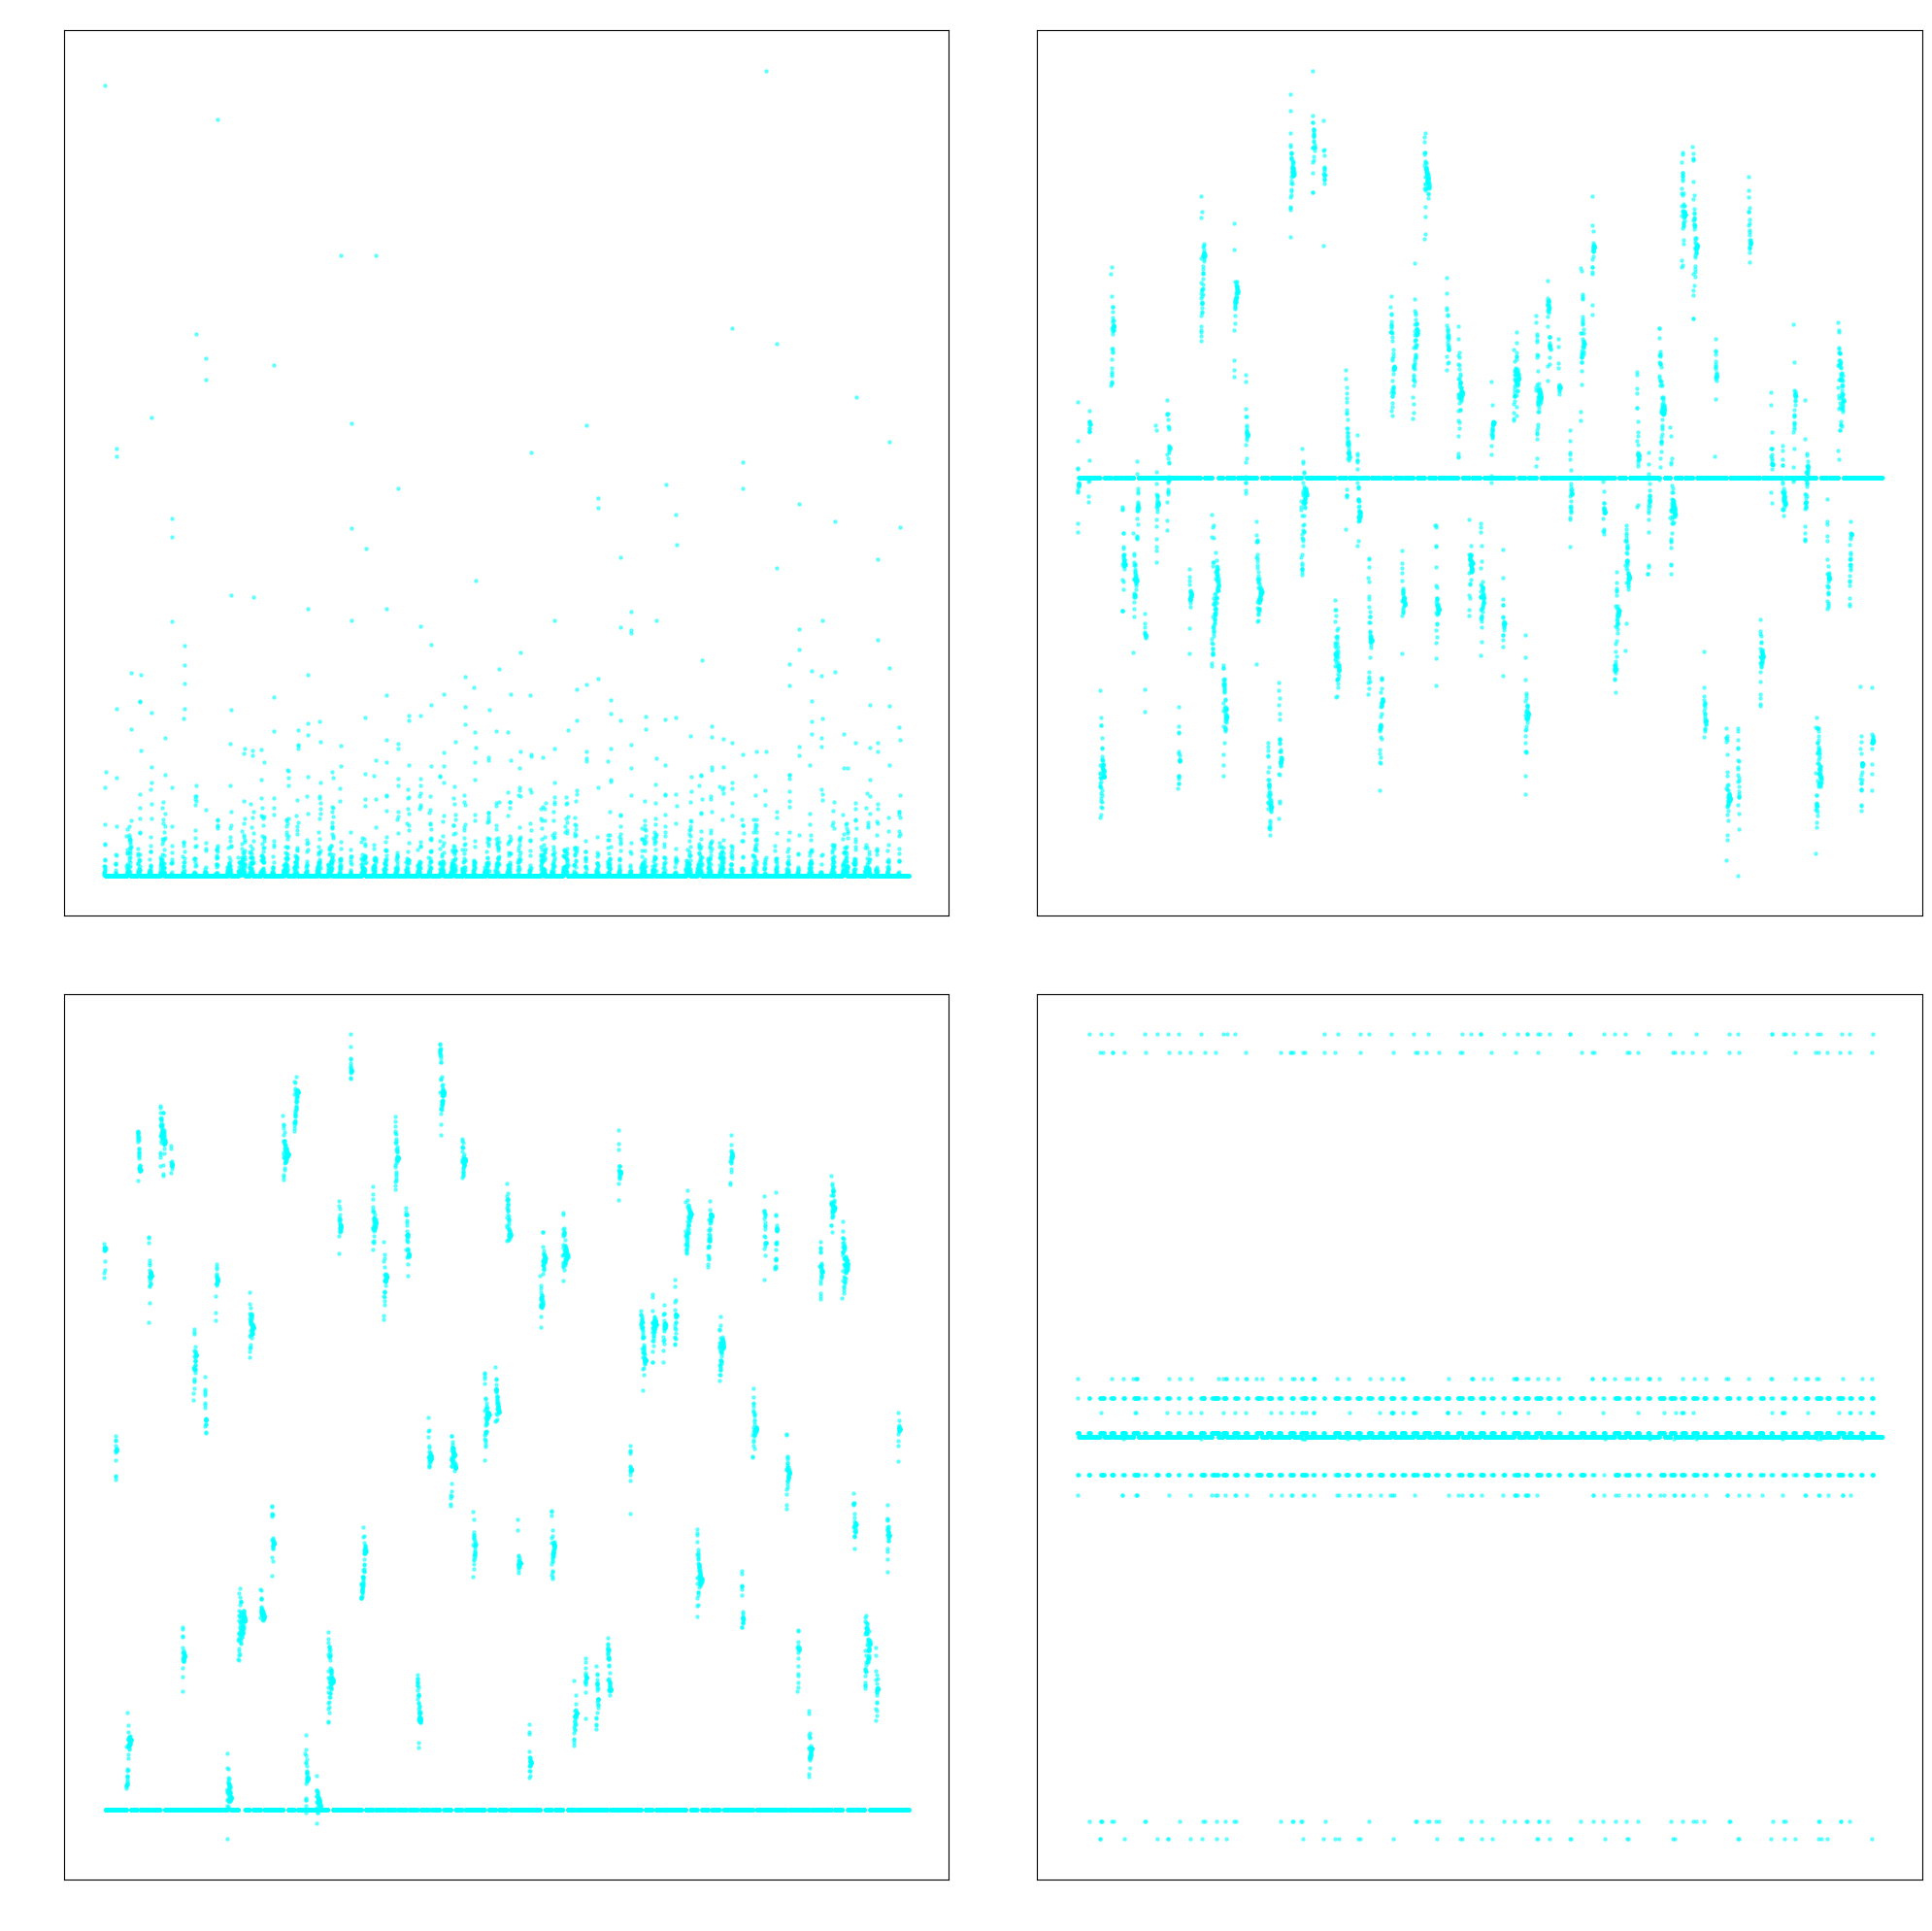

In [4]:
cross_data = data.copy()
%run -i plot.py

The mean and standard deviation should exclude padded rows since they add no value to the dataset. That's why in both mean and standard deviation these padded layers are left out.
The plots of normalized data shows that varied data is lowered thanks to Z Score Normalisation ensuring better model prediction.

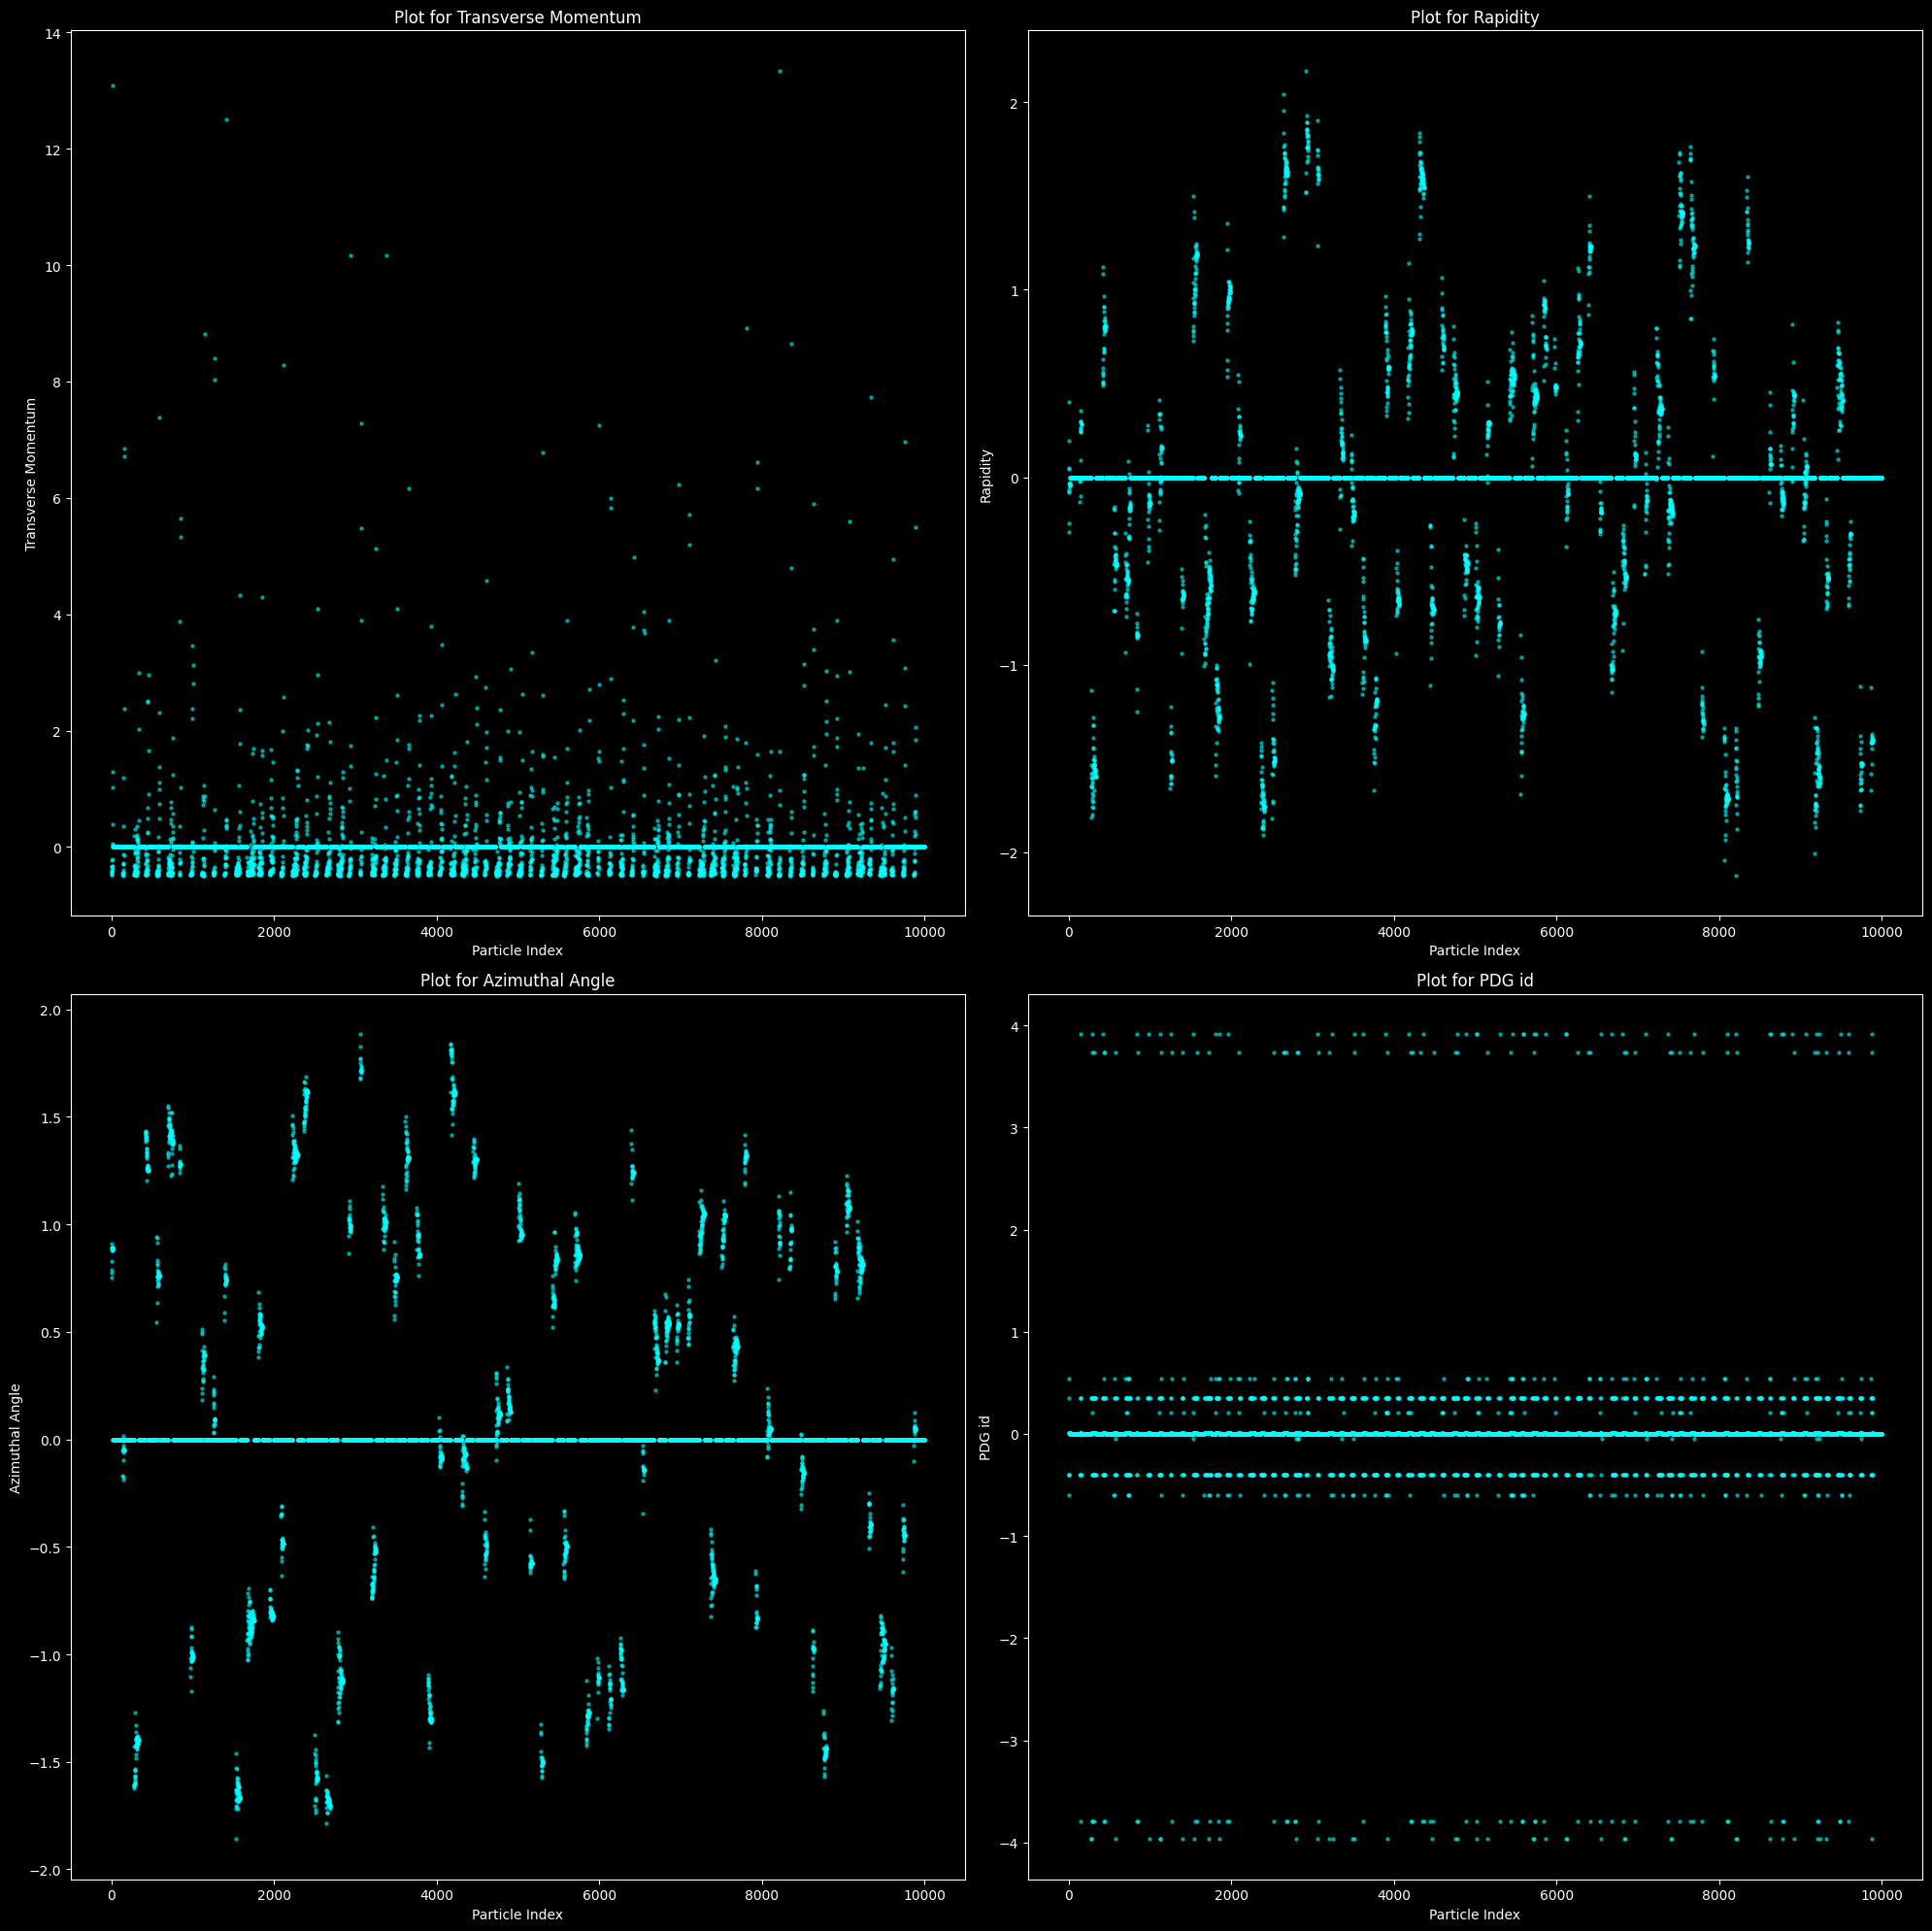

In [5]:
count_arr = []
std_dev = []
for i in range(0,4):
    count_arr.append(np.count_nonzero(data[:,:,i]))
sums_col = np.sum(data, axis=(0, 1))
padd = np.all(data==0, axis=-1)
for i in range(0,4):
    std_dev.append(np.std(data[:, :, i][~padd]))

data_norm = data.copy()
def Z_score(x, std_arr, padd, count, sums_col):
    x_train  = x.copy()   
    for i in range(0,4):
        mean = sums_col[i]/count[i]
        x_train[:,:,i][~padd] = (x[:,:,i][~padd] - mean)/(std_arr[i]);
    return x_train
x_train = Z_score(data,std_dev,padd,count_arr, sums_col)

cross_data = x_train.copy()
%run -i plot.py

# Scikit-Learn
1. The current dimensions of our training data is still 3 dimensional but Scikit learn only process arrays with dimensions less than equal to 2.
Therefore we reduce the amount of dimensions by flattening the training set.
2. This is followed by splitting the data into 2 sections to simultaneously train and test the accuracy of the model.[ train,test,split ]
3. Since the output of the data is binary in nature thus the best model will follow a logistic regression which is commonly used when dealing with classification.


In [14]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=13)
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
Final = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}%")
print(f"Confusion Matrix:\n{matrix}")
print(f"Classification Report:\n{Final}")


Accuracy: 76.0864%
Confusion Matrix:
[[3247  844]
 [1115 2986]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.79      0.77      4091
         1.0       0.78      0.73      0.75      4101

    accuracy                           0.76      8192
   macro avg       0.76      0.76      0.76      8192
weighted avg       0.76      0.76      0.76      8192

